In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

In [ ]:
from keras.models  import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
stats = ['max', 'mean', 'min', 'median']

In [ ]:
x_train = []
x_test = []
for i in stats:
    x_train.append(pd.read_csv(i + '_x_train.csv'))
    x_test.append(pd.read_csv(i + '_x_test.csv'))

In [ ]:
x_train[0].shape

(50000, 35)

In [ ]:
y_train = pd.read_csv('y_train.csv')

y_test  = pd.read_csv('y_test.csv')

y_train = np.ravel(y_train)

### Criação e Treinamento da Random Forest

In [ ]:
def forest(data_x_train, data_y_train, data_x_test, data_y_test):

    rfc = RandomForestClassifier(n_estimators = 100, max_features = 10)
    cf = rfc.fit(data_x_train, data_y_train)
    
    y_predicted = cf.predict(data_x_test)

    acc_score = accuracy_score(data_y_test, y_predicted)
    
    return cf, acc_score

In [ ]:
florestas = [0]*4
f_acc_score = [0]*4

for i in tqdm(range(4)):
    florestas[i], f_acc_score[i] = forest(x_train[i], y_train, x_test[i], y_test)

100%|██████████| 4/4 [01:21<00:00, 20.28s/it]


### Acurácia da Random Forest

In [ ]:
for i in range(4):
  print(f"{stats[i]}: {f_acc_score[i]}")

max: 0.9700645666210135
mean: 0.9694775973390726
min: 0.8994325963607904
median: 0.9577382117002543


### Matrix de Confusção para as Random Forest

In [ ]:
def matrixConfusion(model, data_x_test, data_y_test):
    y_pred = model.predict(data_x_test)
    
    cm = confusion_matrix(data_y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    cm_display = ConfusionMatrixDisplay(cm, display_labels = model.classes_).plot()

    print(f"True Neg: {tn}, False Pos: {fp}, False Neg: {fn}, True Pos: {tp}")
    #The precision is the ratio tp / (tp + fp) 
    print(f"Precision: {tp / (tp + fp)}")
    print(f"Accuracy: {(tp + tn) / 5111}")

True Neg: 2688, False Pos: 98, False Neg: 55, True Pos: 2270
Precision: 0.9586148648648649
Accuracy: 0.9700645666210135


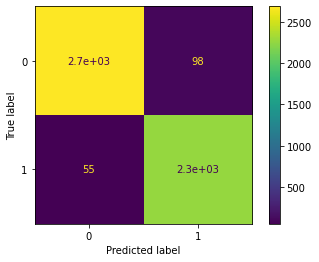

In [ ]:
matrixConfusion(florestas[0], x_test[0], y_test)

True Neg: 2691, False Pos: 95, False Neg: 61, True Pos: 2264
Precision: 0.9597286986011022
Accuracy: 0.9694775973390726


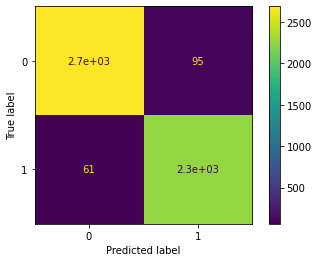

In [ ]:
matrixConfusion(florestas[1], x_test[1], y_test)

True Neg: 2519, False Pos: 267, False Neg: 247, True Pos: 2078
Precision: 0.886140724946695
Accuracy: 0.8994325963607904


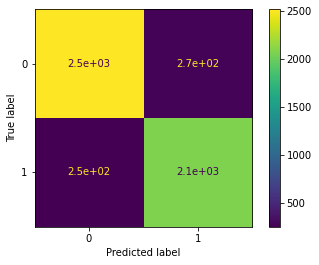

In [ ]:
matrixConfusion(florestas[2], x_test[2], y_test)

True Neg: 2649, False Pos: 137, False Neg: 79, True Pos: 2246
Precision: 0.9425094418799832
Accuracy: 0.9577382117002543


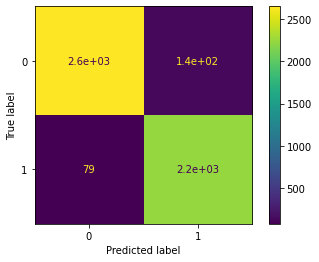

In [ ]:
matrixConfusion(florestas[3], x_test[3], y_test)

## Criação e Treinamento da MLP

In [ ]:
def machine(data_x_train, data_y_train):
    mlp = Sequential([                  
        InputLayer(35),
        Dense(24, activation = "relu"),
        Dense(1, activation = "sigmoid")
    ])

    mlp.compile(optimizer="adam", loss="binary_crossentropy")

    log = mlp.fit(data_x_train, data_y_train, batch_size = 64, epochs = 50)

    return mlp, log

In [ ]:
rede = [0] * 4
Logs = [0] * 4

for i in tqdm(range(4)):
   rede[i], Logs[i] = machine(x_train[i], y_train)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/50
782/782 [==============================] - 2s 1ms/step - loss: 0.2985
Epoch 2/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1949
Epoch 3/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1854
Epoch 4/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1799
Epoch 5/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1756
Epoch 6/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1716
Epoch 7/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1679
Epoch 8/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1644
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1617
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1585
Epoch 11/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1558
Epoch 12/50
782/782 [==============================] - 1s 1ms/step - loss: 0.1535
Epoch 13/50
782/782 [====

 25%|██▌       | 1/4 [01:22<04:07, 82.45s/it]

Epoch 1/50
782/782 [==============================] - 2s 2ms/step - loss: 0.3528
Epoch 2/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2633
Epoch 3/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2512
Epoch 4/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2426
Epoch 5/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2360
Epoch 6/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2310
Epoch 7/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2269
Epoch 8/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2234
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2207
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 11/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2161
Epoch 12/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2141
Epoch 13/50
782/782 [====

 50%|█████     | 2/4 [02:19<02:14, 67.26s/it]

Epoch 1/50
782/782 [==============================] - 1s 1ms/step - loss: 0.4259
Epoch 2/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3888
Epoch 3/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3758
Epoch 4/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3650
Epoch 5/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3545
Epoch 6/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3441
Epoch 7/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3331
Epoch 8/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3219
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3112
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3017
Epoch 11/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2938
Epoch 12/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2870
Epoch 13/50
782/782 [====

 75%|███████▌  | 3/4 [03:41<01:14, 74.18s/it]

Epoch 1/50
782/782 [==============================] - 1s 1ms/step - loss: 0.3597
Epoch 2/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2818
Epoch 3/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2764
Epoch 4/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2718
Epoch 5/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2663
Epoch 6/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2604
Epoch 7/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2545
Epoch 8/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2496
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2451
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2426
Epoch 11/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2403
Epoch 12/50
782/782 [==============================] - 1s 1ms/step - loss: 0.2386
Epoch 13/50
782/782 [====

100%|██████████| 4/4 [05:03<00:00, 75.97s/it]


In [ ]:
rede[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                864       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


### Gráfico de Erro do Treinamento da MLP

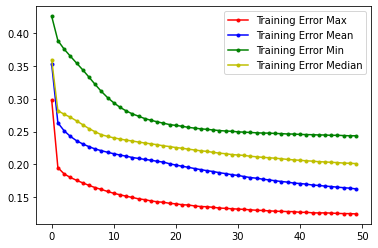

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(Logs[0].history["loss"], 'r', marker = '.', label = "Training Error Max")
ax.plot(Logs[1].history["loss"], 'b', marker = '.', label = "Training Error Mean")
ax.plot(Logs[2].history["loss"], 'g', marker = '.', label = "Training Error Min")
ax.plot(Logs[3].history["loss"], 'y', marker = '.', label = "Training Error Median")
ax.legend();

In [ ]:
y_predicteds = []

for i in range(4):
    y_predicteds.append( rede[i].predict(x_test[i]) )

In [ ]:
y_predicts = []

for i in range(4):
    y_predicts.append( (y_predicteds[i] > 0.5).astype("int32") )

### Acurácia da MLP

In [ ]:
for i in range(4):
    print( f"{stats[i]}: {accuracy_score(y_test, y_predicts[i])}" )

max: 0.9522598317354725
mean: 0.9182156133828996
min: 0.8863236157307768
median: 0.8992369399334769


### Precisao da MLP

In [ ]:
for i in range(4):
    print(f"{stats[i]}: {precision_score(y_test, y_predicts[i])}" )

max: 0.9330004161464835
mean: 0.8731898238747554
min: 0.8454833597464342
median: 0.8588421887390959


In [ ]:
np.all(np.isfinite( x_train[3] ))

np.any(np.isnan( x_train[3] ))